This ignores all the warnings which comes during the execution of code.

In [1]:
from warnings import simplefilter
simplefilter(action='ignore')

Importing all the necessary Python Packages for Logistic Regression.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

The database is stored in "insurance2.csv" having the following data.

In [3]:
insuranceDF = pd.read_csv('insurance2.csv')
insuranceDF.info()
insuranceDF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


This gives the co-relation between the various features of the database.

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

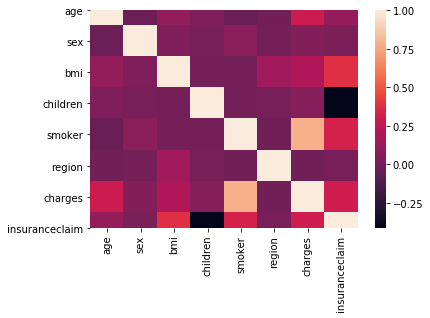

In [4]:
corr = insuranceDF.corr();
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

This gives the count of the various features based on whether the insurance claim has been made or not

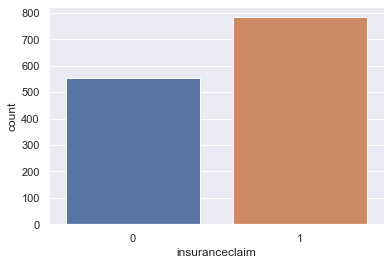

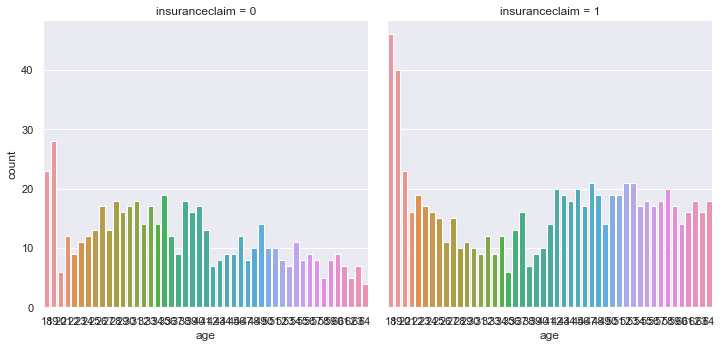

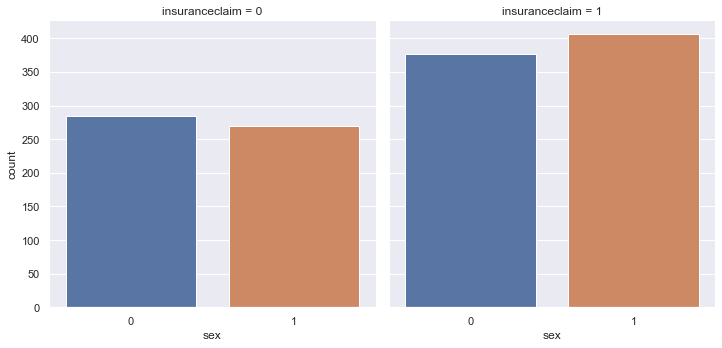

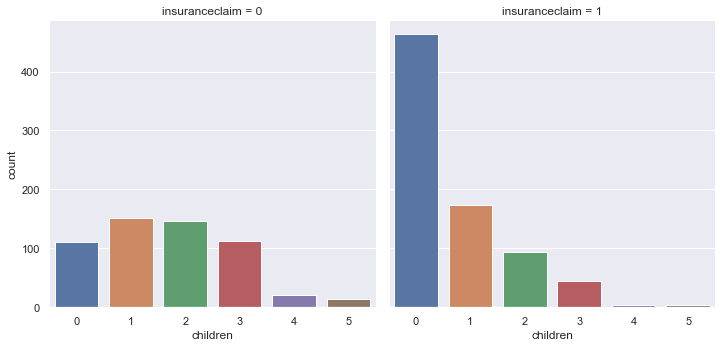

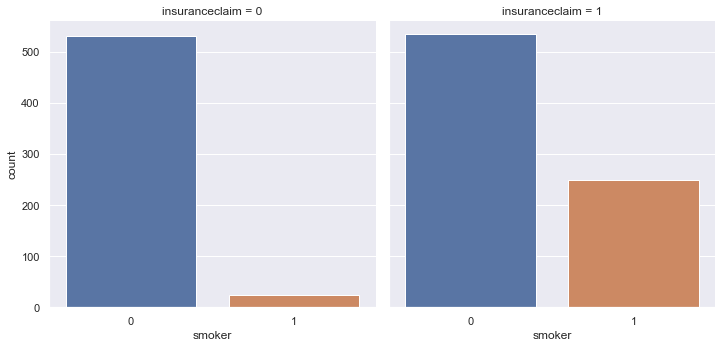

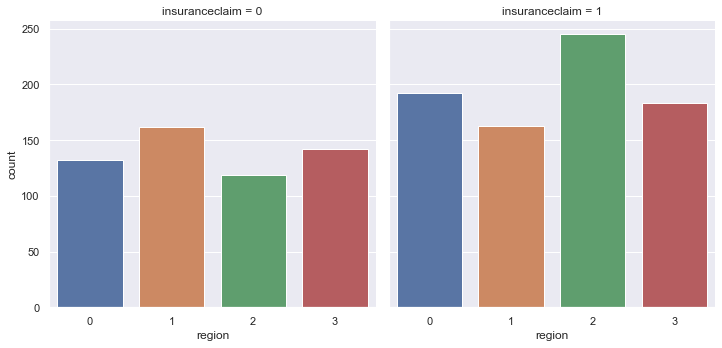

In [5]:
sns.set(style="darkgrid")
sns.countplot(x='insuranceclaim',data=insuranceDF)
sns.catplot(x="age", col="insuranceclaim",data=insuranceDF, kind="count")
sns.catplot(x="sex", col="insuranceclaim",data=insuranceDF, kind="count")
sns.catplot(x="children", col="insuranceclaim",data=insuranceDF, kind="count")
sns.catplot(x="smoker", col="insuranceclaim",data=insuranceDF, kind="count")
sns.catplot(x="region", col="insuranceclaim",data=insuranceDF, kind="count")
plt.show()

This specifies the size of the dataset to be used for Model Training.
Specify the range in [ : ] to select a portion of the dataset.

In [8]:
dfTrain = insuranceDF[:]

Apply Logistic Regression Model for the dataset.

In [9]:
trainLabel = np.asarray(dfTrain['insuranceclaim'])
trainData = np.asarray(dfTrain.drop('insuranceclaim',1))


means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds



insuranceCheck = LogisticRegression(solver="lbfgs")
insuranceCheck.fit(trainData, trainLabel)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Plotting Feature Chart to get the influence of various parameters on the Insurance Prediction Claim.

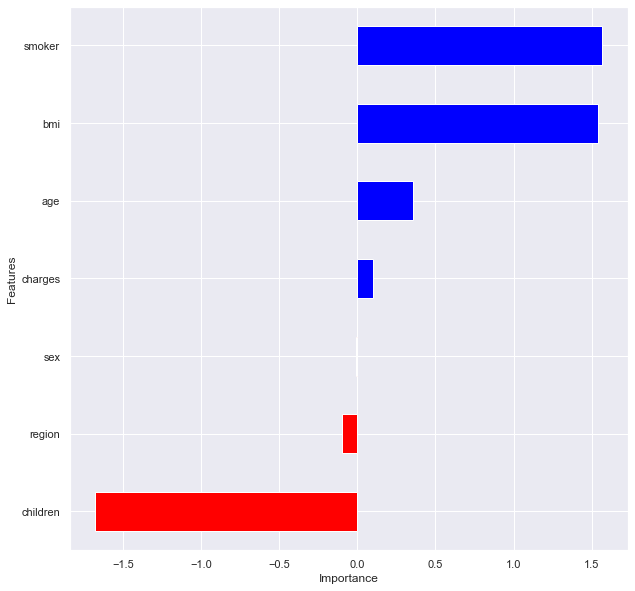

In [10]:
coeff = list(insuranceCheck.coef_[0])
labels = list(dfTrain.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(10, 10),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()

The following conclusion can be drawn from the above Feature Chart:-
1. BMI, Smoker have significant influence on the model, specially BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!

2. Children has a negative influence on the prediction, i.e. higher number children / dependents are correlated with a policyholder not taken insurance claim.

3. Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.

Note that this above interpretations require that our input data is normalized. Without that, we can't claim that importance is proportional to weights.

Firstly, the model is trained 100 times using train_test_split.
And this Process is again repeated for 100 times to get more accurate model.

List 'z' stores the the maximum Percentage Accuracy Score (PAS) of each Internal Iteration.

In [11]:
z=[]

In [12]:
m=0
me=0
for j in range(0,100):
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(trainData,trainLabel)
        insuranceCheck.fit(x_train,y_train)
        yp=insuranceCheck.predict(x_test)
        p=accuracy_score(y_test,yp)
        if p>=m:
            m=p
            me = mean_absolute_error(y_test, yp)
    z.append(m*100)
print("Highest Accurate Model Accuracy Score=>",max(z),'%')
print("MAE=>",me)

Highest Accurate Model Accuracy Score=> 93.73134328358209 %
MAE=> 0.0626865671641791
